==================================================================================

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [6]:
classes =['airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
classes[9]

'truck'

None


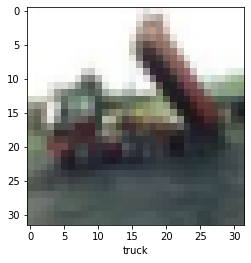

In [8]:
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

print(plot_sample(X_train, y_train, 2))

None


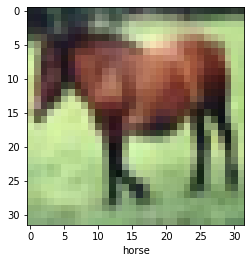

In [9]:
print(plot_sample(X_train, y_train, 7))

In [10]:
X_train = X_train / 255
X_test = X_test / 255

                        Artifical Neural Networks

In [31]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
ann.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 206s 81ms/step - loss: 1.8401 - accuracy: 0.3446
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6560 - accuracy: 0.4118
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5751 - accuracy: 0.4437
Epoch 4/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.5164 - accuracy: 0.4657
Epoch 5/5
1563/1563 [==============================] - 49s 32ms/step - loss: 1.4681 - accuracy: 0.4806


In [34]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 14ms/step - loss: 1.5211 - accuracy: 0.4585


[1.521118402481079, 0.4584999978542328]

                        45.85% accurate

================================================================================

                        Convolutional Neural Networks

In [11]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # fully dense network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
cnn.fit(
    X_train, y_train, epochs=5
)

Epoch 1/5
1563/1563 [==============================] - 104s 43ms/step - loss: 1.4941 - accuracy: 0.4638
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1412 - accuracy: 0.5986
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0096 - accuracy: 0.6477
Epoch 4/5
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9287 - accuracy: 0.6789
Epoch 5/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8633 - accuracy: 0.7007


In [14]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.9494 - accuracy: 0.6731


[0.9493960738182068, 0.6730999946594238]

                            67.3% accurate

    After 5 epochs, Artificial Neural Networks on the cifar10 dataset manages 45.85% accuracy, while Convolutional Neural Networks achieves 67.3% accuracy